# Prepare a prediction model for whether the client has subscribed a term deposit or not.

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()

<Figure size 7000x5250 with 0 Axes>

### Adding Dataset

In [4]:
bk = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/working/Assignment_06_Logistic%20Regression/Dataset/bank-full.csv',sep=";")

bk.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
df_nrow = bk.shape[0]

In [ ]:
def lost_record():
    
    bk_nrow_now = bk.shape[0]
    lost = bk_nrow - bk_nrow_now
    lost = (lost/bk_nrow)*100
    lost = round(lost,2)

    return print('We lost ' + str(lost) + ' % data')

## Performing EDA In Dataset

### Applying Descriptive Statistics

In [ ]:
tc.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [ ]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
tc.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
def uni(df):
    
    for i in range(len(df.columns)):
        print('\n All Unique Value in '+ str(df.columns[i]) )
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' + str(len(df[df.columns[i]].unique())))
        

In [ ]:
uni(tc)


 All Unique Value in Price
[ 4350  4400  4450  4750  5150  5250  5600  5740  5750  5751  5800  5845
  5900  5950  6000  6150  6250  6400  6425  6450  6490  6495  6500  6550
  6640  6650  6750  6800  6900  6950  6990  6999  7000  7145  7150  7200
  7250  7300  7350  7400  7450  7460  7490  7495  7499  7500  7600  7750
  7795  7800  7850  7900  7950  7990  7995  7999  8000  8050  8100  8150
  8200  8250  8400  8450  8490  8495  8500  8600  8695  8700  8745  8750
  8800  8850  8895  8900  8950  8990  8995  9000  9130  9200  9245  9250
  9390  9400  9450  9475  9500  9550  9650  9695  9700  9750  9795  9799
  9800  9850  9895  9900  9930  9940  9950  9980  9990  9995 10000 10250
 10295 10350 10400 10450 10495 10500 10600 10750 10800 10845 10850 10895
 10900 10950 10990 10995 11000 11250 11290 11450 11480 11495 11500 11650
 11690 11695 11700 11710 11750 11790 11895 11900 11925 11930 11950 11990
 12000 12200 12250 12295 12400 12450 12495 12500 12695 12750 12850 12900
 12950 12995 13000 1325

In [ ]:
np.sort(tc['KM'].unique())

array([     1,     15,    225, ..., 218118, 232940, 243000], dtype=int64)

In [ ]:
np.sort(tc['KM'].unique())[0]

1

- Just confirming Kilometers lowest value.

### Checking for Duplicated Values

In [ ]:
tc[tc.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [ ]:
tc.drop_duplicates(inplace = True)

- There is 1 duplicate vale in are dataset

### Visualizing The Data

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

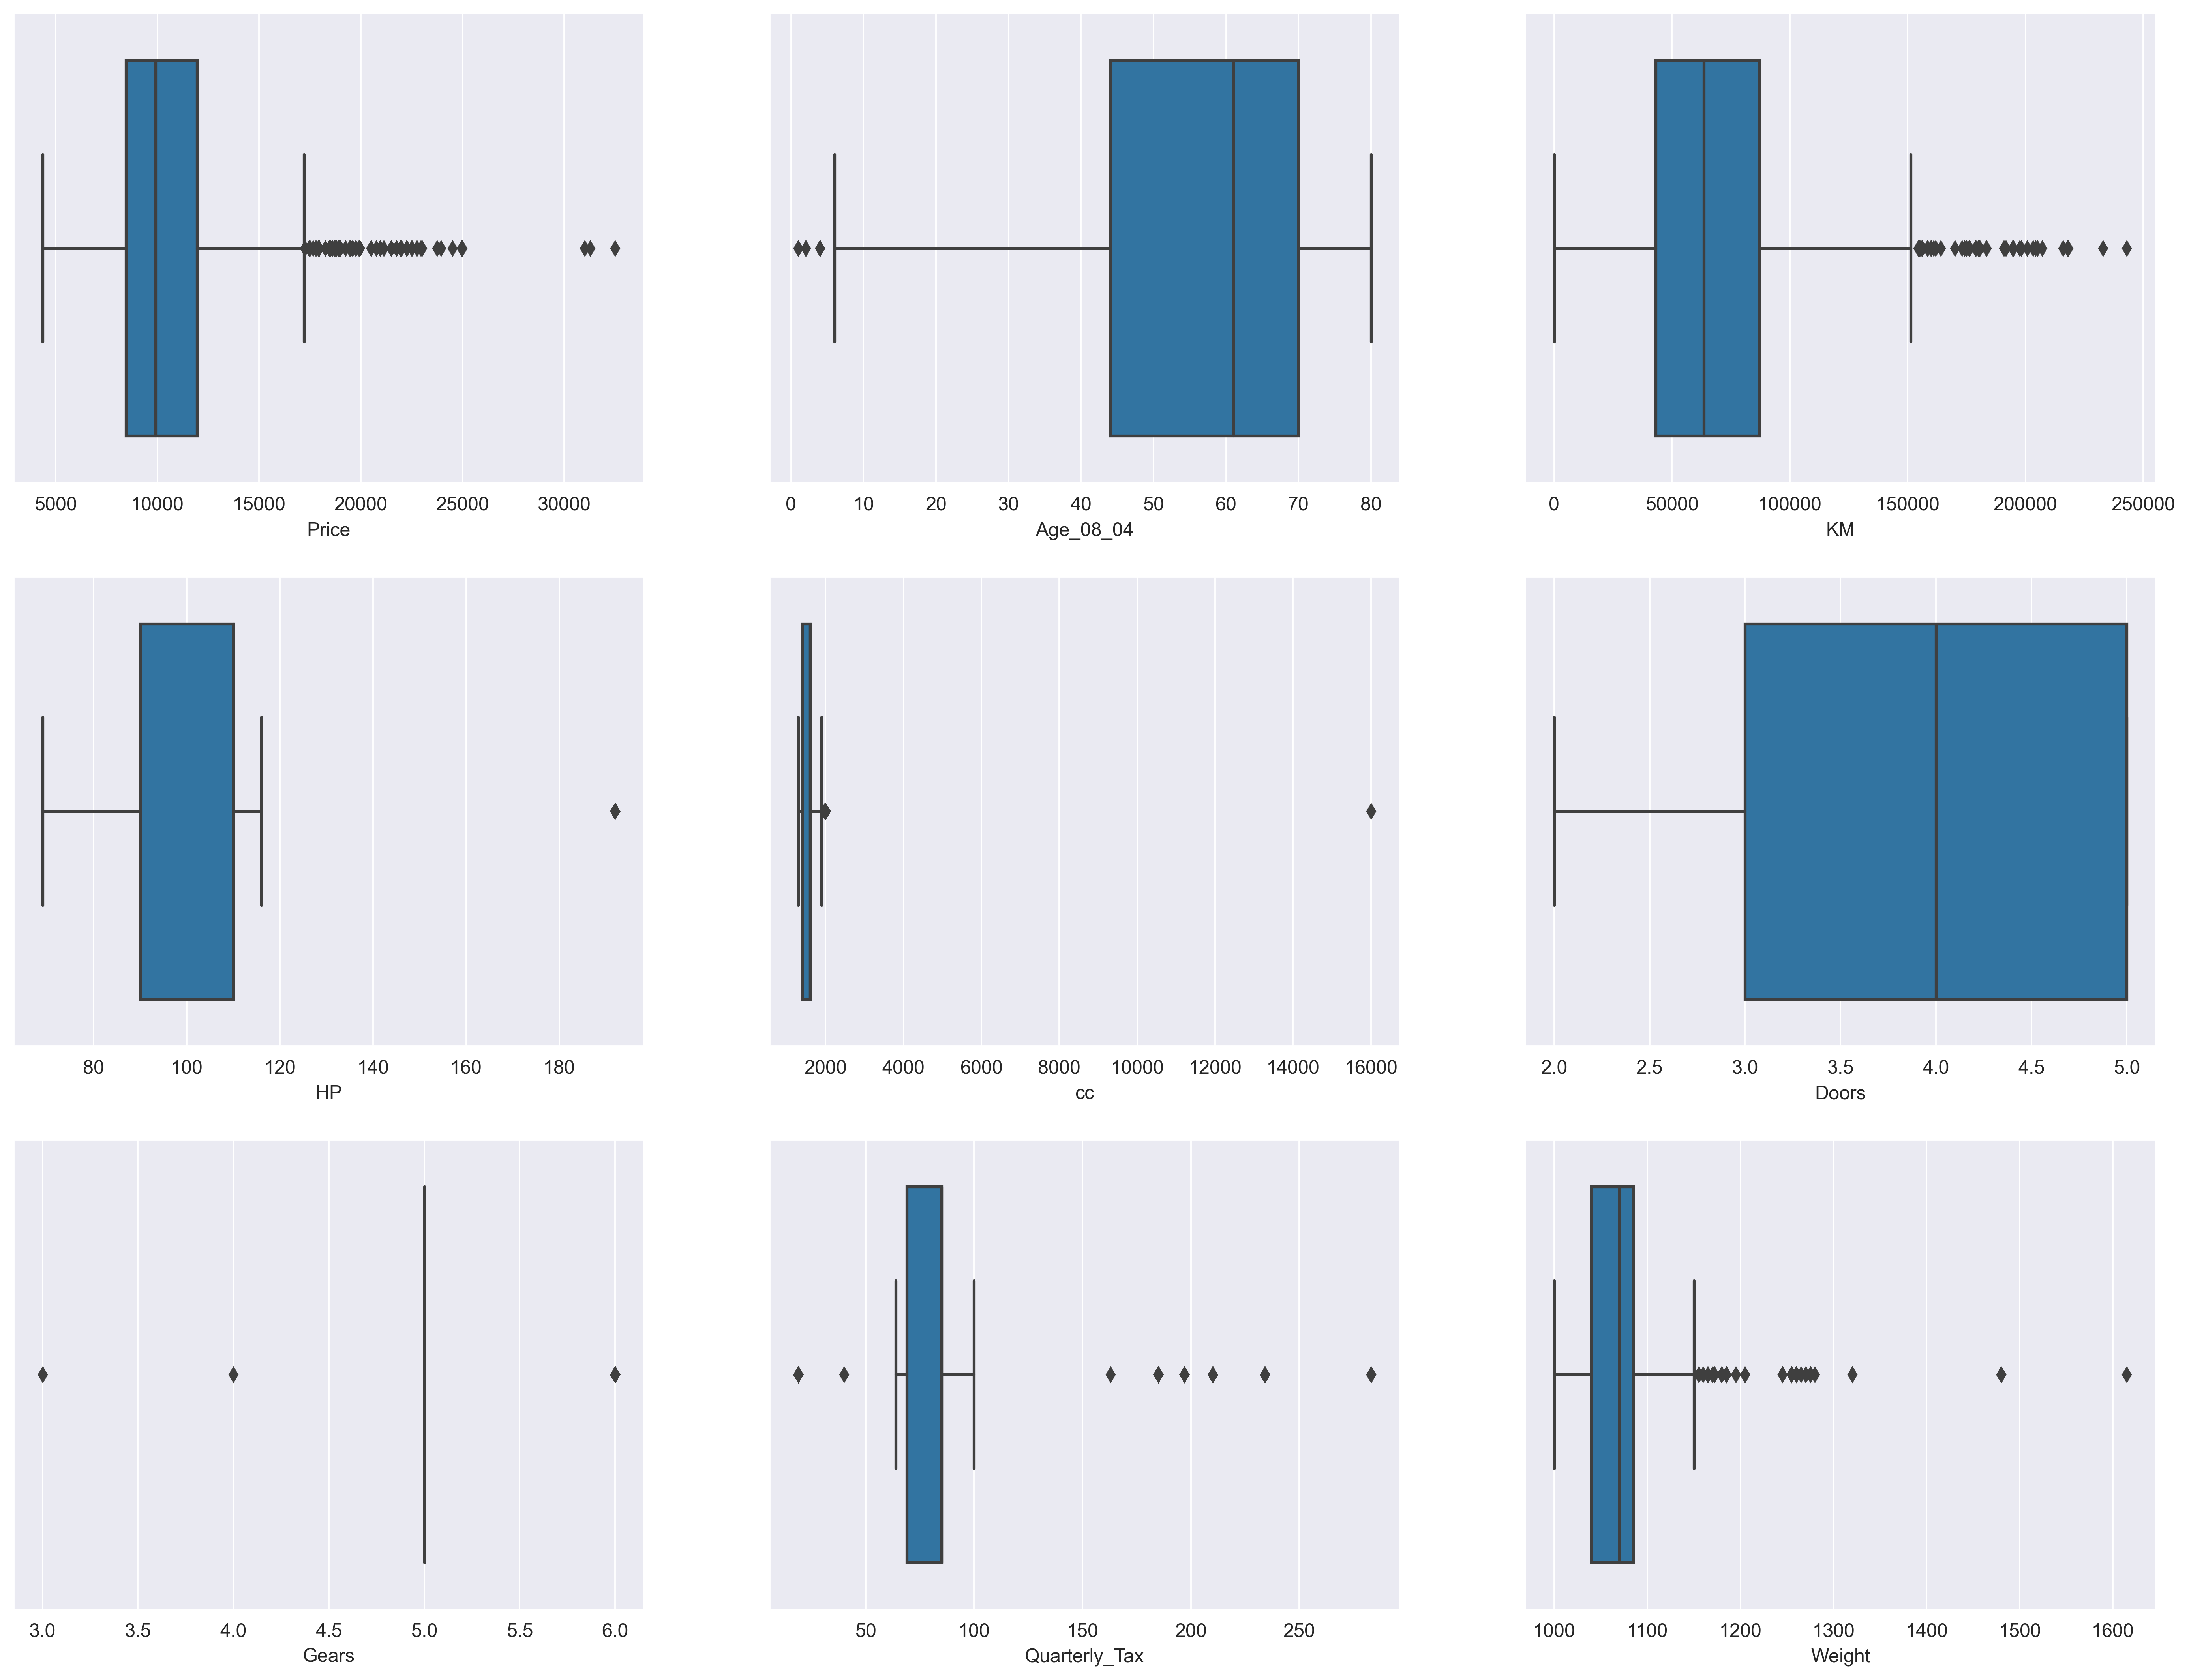

In [ ]:
fig, ax = plt.subplots(3,3)

sns.boxplot(tc['Price'], ax = ax[0,0])
sns.boxplot(tc['Age_08_04'], ax = ax[0,1])
sns.boxplot(tc['KM'], ax = ax[0,2])
sns.boxplot(tc['HP'], ax = ax[1,0])
sns.boxplot(tc['cc'], ax = ax[1,1])
sns.boxplot(tc['Doors'], ax = ax[1,2])
sns.boxplot(tc['Gears'], ax = ax[2,0])
sns.boxplot(tc['Quarterly_Tax'], ax = ax[2,1])
sns.boxplot(tc['Weight'], ax = ax[2,2])

plt.tight_layout

In [ ]:
fig, ax = plt.subplots(3,3)

sns.histplot(tc['Price'], ax = ax[0,0])
sns.histplot(tc['Age_08_04'], ax = ax[0,1])
sns.histplot(tc['KM'], ax = ax[0,2])
sns.histplot(tc['HP'], ax = ax[1,0])
sns.histplot(tc['cc'], ax = ax[1,1])
sns.histplot(tc['Doors'], ax = ax[1,2])
sns.histplot(tc['Gears'], ax = ax[2,0])
sns.histplot(tc['Quarterly_Tax'], ax = ax[2,1])
sns.histplot(tc['Weight'], ax = ax[2,2])

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [ ]:
fig, ax = plt.subplots(3,3)

sm.qqplot(tc['Price'], ax = ax[0,0], line ='q')
sm.qqplot(tc['Age_08_04'], ax = ax[0,1], line ='q')
sm.qqplot(tc['KM'], ax = ax[0,2], line ='q')
sm.qqplot(tc['HP'], ax = ax[1,0], line ='q')
sm.qqplot(tc['cc'], ax = ax[1,1], line ='q')
sm.qqplot(tc['Doors'], ax = ax[1,2], line ='q')
sm.qqplot(tc['Gears'], ax = ax[2,0], line ='q')
sm.qqplot(tc['Quarterly_Tax'], ax = ax[2,1], line ='q')
sm.qqplot(tc['Weight'], ax = ax[2,2])

plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

### Correlation Analysis

In [ ]:
sns.pairplot(data = tc)

<AxesSubplot:>

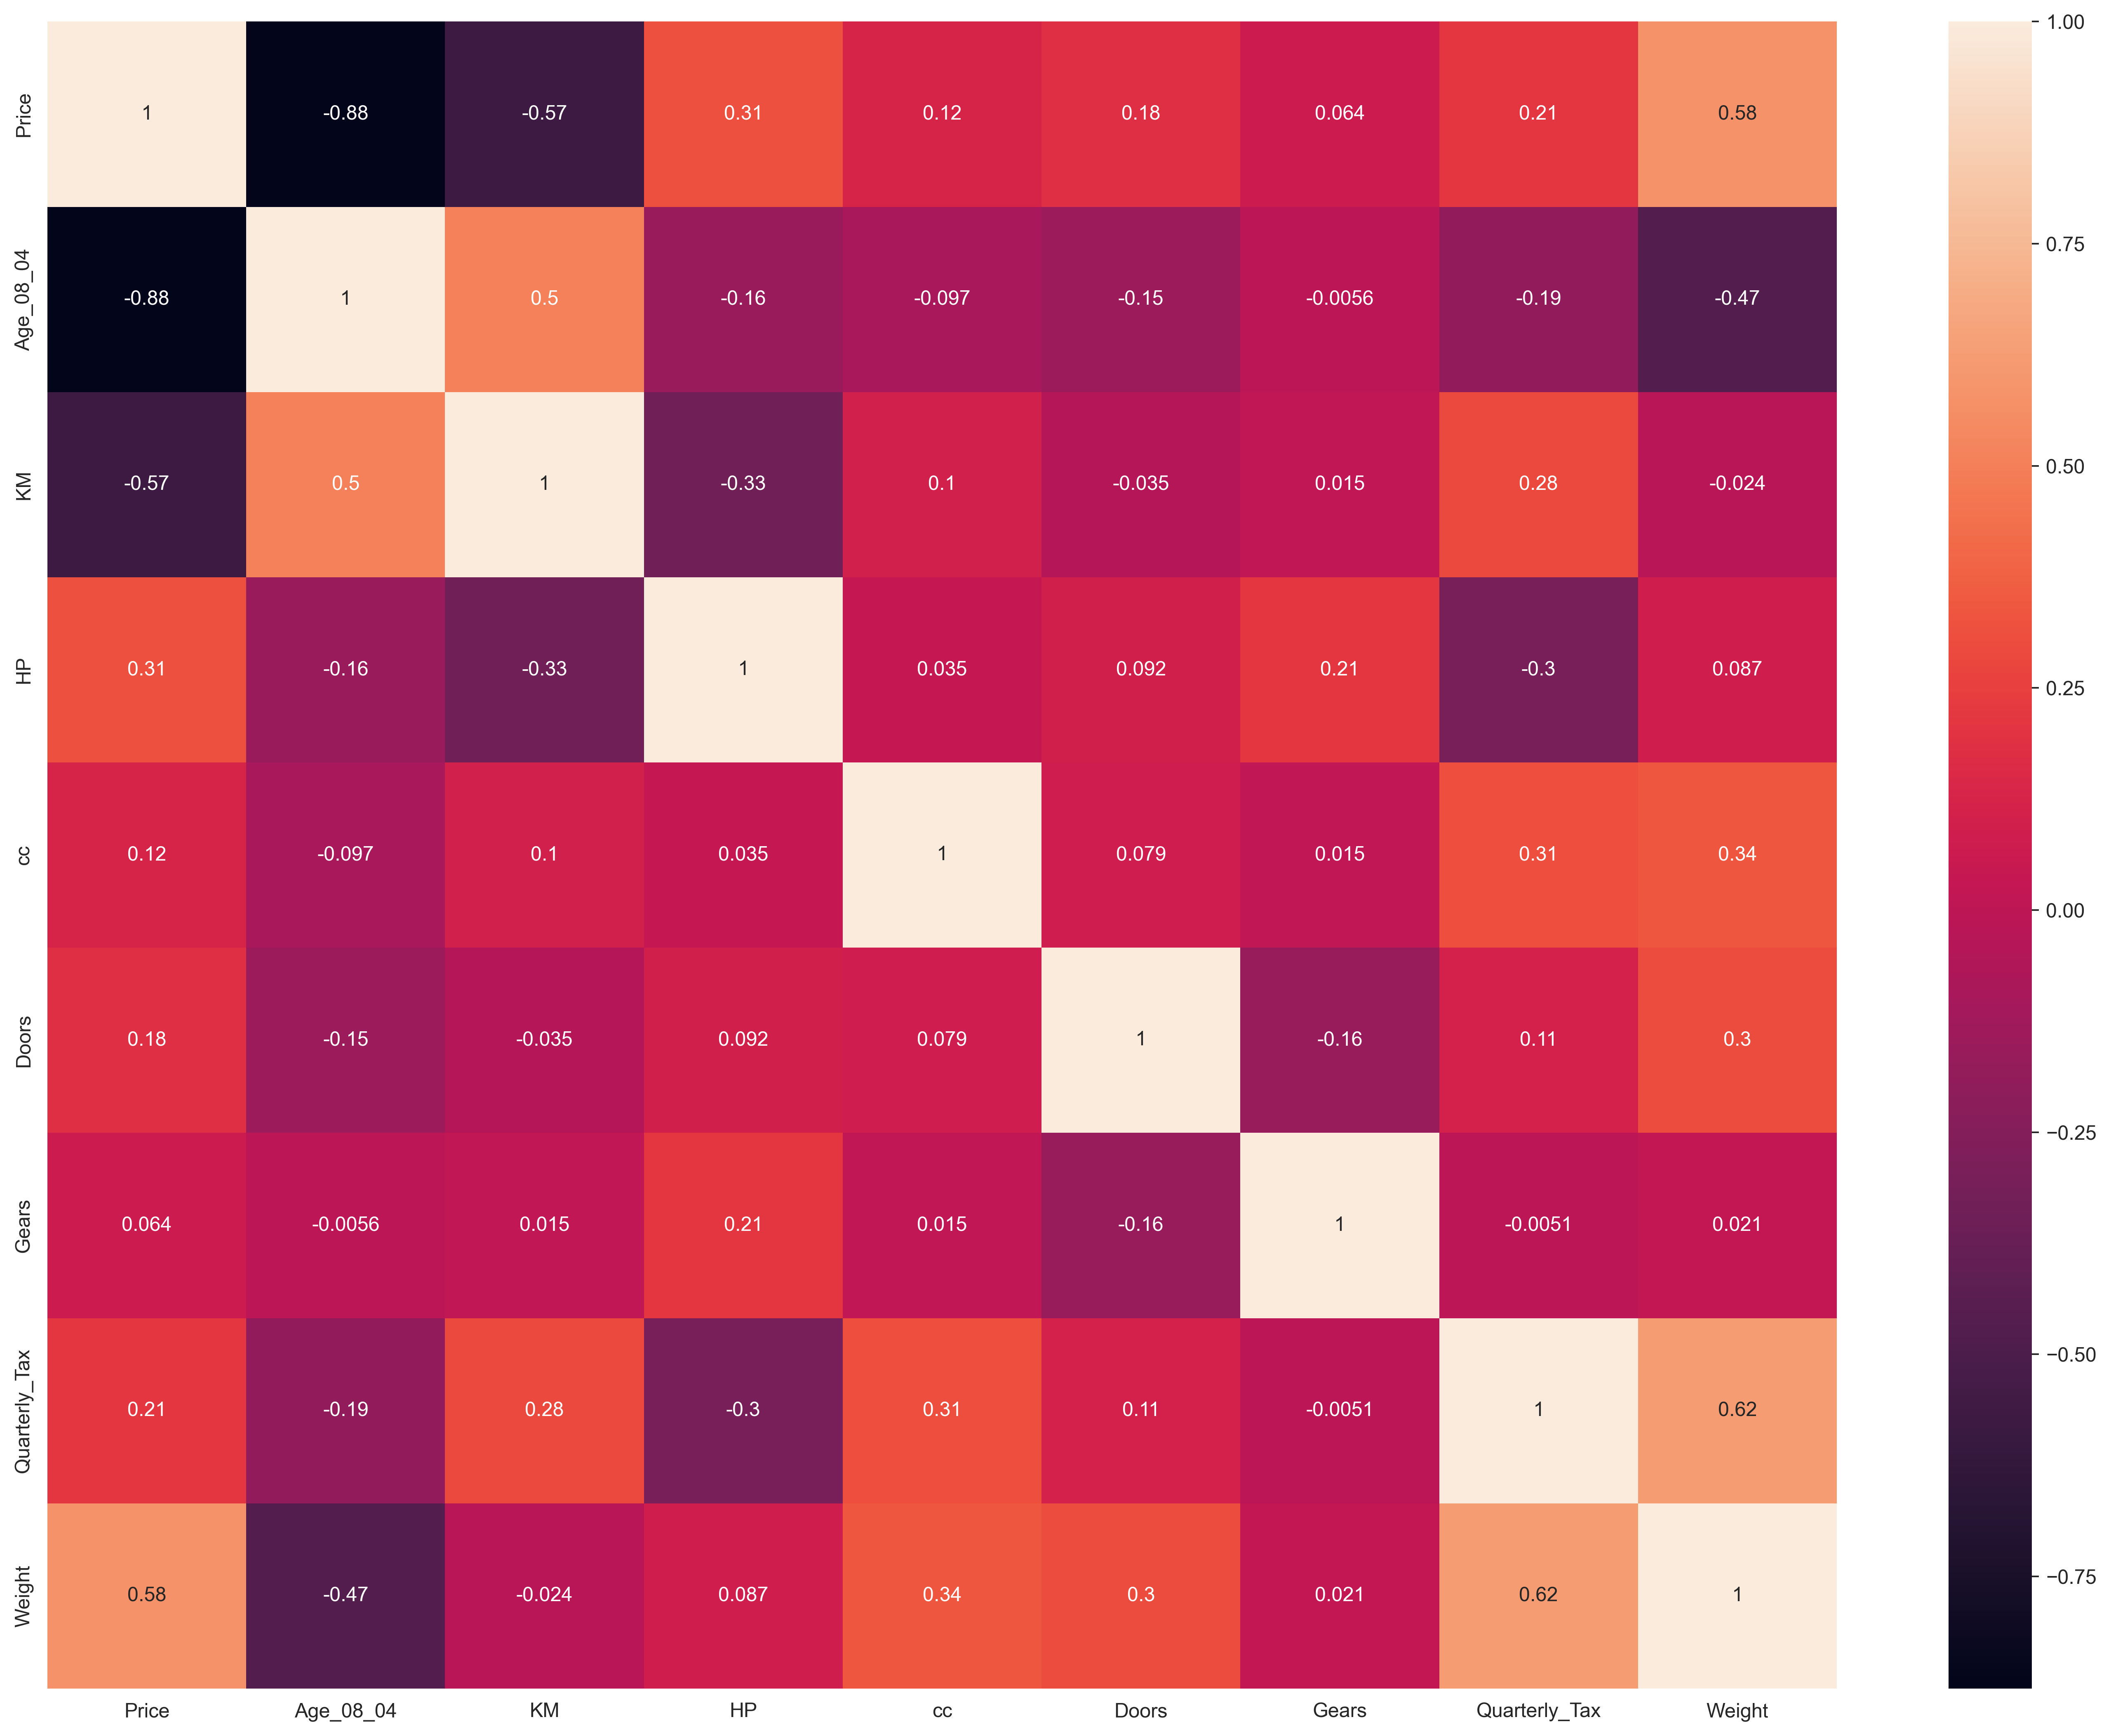

In [ ]:
sns.heatmap(tc.corr(), annot = True)

### Outlier Detection

In [ ]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) + (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')




In [ ]:
def replace_outlier_extream(st,col):
  
  q1 = st[col].quantile(0.25)
  q3 = st[col].quantile(0.75)
  iqr = q3-q1

  upper = q3 + (iqr*1.5)
  lower = q1 - (iqr*1.5)
  
  st[col].mask(st[col] > upper, upper, inplace=True)
  st[col].mask(st[col] < lower, lower, inplace=True)

In [ ]:
def remove_outlier(st,col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col]>lower) & (st[col]<upper)]

    return st

#### Outlier Percentage (Before)

In [ ]:
outlier_percentage(tc)

Price : 7.595818815331011 %
Age_08_04 : 0.4878048780487805 %
KM : 3.414634146341464 %
HP : 0.7665505226480837 %
cc : 8.501742160278745 %
Doors : 0.0 %
Gears : 3.2055749128919864 %
Quarterly_Tax : 15.540069686411151 %
Weight : 4.529616724738676 %


#### Replacing Outlier In Price Column

In [ ]:
pe.box(tc['Price'], orientation='h')

In [ ]:
replace_outlier_extream(tc,'Price')

In [ ]:
pe.box(tc['Price'], orientation='h')

#### Removing Outlier In Age_08_04 Column

In [ ]:
pe.box(tc['Age_08_04'], orientation = 'h')

In [ ]:
tc = remove_outlier(tc,'Age_08_04')

In [ ]:
pe.box(tc['Age_08_04'], orientation = 'h')

In [ ]:
lost_record()

We lost 0.56 % data


#### Replacing Outlier In KM Column

In [ ]:
pe.box(tc['KM'], orientation = 'h')

In [ ]:
replace_outlier_extream(tc,'KM')

In [ ]:
pe.box(tc['KM'], orientation = 'h')

#### Removing Outlier In HP Column

In [ ]:
pe.box(tc['HP'], orientation = 'h')

In [ ]:
tc = remove_outlier(tc,'HP')

In [ ]:
pe.box(tc['HP'], orientation = 'h')

In [ ]:
lost_record()

We lost 1.32 % data


#### Replacing Outlier In CC Column

In [ ]:
pe.box(tc['cc'], orientation = 'h')

In [ ]:
replace_outlier_extream(tc,'cc')

In [ ]:
pe.box(tc['cc'], orientation = 'h')

#### Replacing Outlier In Quarterly Tax Column

In [ ]:
pe.box(tc['Quarterly_Tax'], orientation = 'h')

In [ ]:
replace_outlier_extream(tc,'Quarterly_Tax')

In [ ]:
pe.box(tc['Quarterly_Tax'], orientation = 'h')

#### Replacing Outlier In Weight Column

In [ ]:
pe.box(tc['Weight'], orientation = 'h')

In [ ]:
replace_outlier_extream(tc,'Weight')

In [ ]:
pe.box(tc['Weight'], orientation = 'h')

#### Outlier Percentage (After)

In [ ]:
outlier_percentage(tc)

Price : 6.492589978828511 %
Age_08_04 : 0.0 %
KM : 0.0 %
HP : 0.0 %
cc : 0.0 %
Doors : 0.0 %
Gears : 2.7522935779816518 %
Quarterly_Tax : 0.0 %
Weight : 0.0 %


#### Reindexing Columns

In [ ]:
tc

Price  Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0     13500         23  46986.0   90  1900      3      5            109   
1     13750         23  72937.0   90  1900      3      5            109   
2     13950         24  41711.0   90  1900      3      5            109   
3     14950         26  48000.0   90  1900      3      5            109   
4     13750         30  38500.0   90  1900      3      5            109   
...     ...        ...      ...  ...   ...    ...    ...            ...   
1431   7500         69  20544.0   86  1300      3      5             69   
1432  10845         72  19000.0   86  1300      3      5             69   
1433   8500         71  17016.0   86  1300      3      5             69   
1434   7250         70  16916.0   86  1300      3      5             69   
1435   6950         76      1.0  110  1600      5      5             45   

      Weight  
0     1152.5  
1     1152.5  
2     1152.5  
3     1152.5  
4     1152.5  
...      ...  
1431  1025.0  
1432  1015.0  
1433  1015.0  
1434  1015.0  
1435  1114.0  

[1417 rows x 9 columns]

In [ ]:
tc.reset_index(inplace=True)
tc.drop(columns='index',inplace=True)

tc

Price  Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0     13500         23  46986.0   90  1900      3      5            109   
1     13750         23  72937.0   90  1900      3      5            109   
2     13950         24  41711.0   90  1900      3      5            109   
3     14950         26  48000.0   90  1900      3      5            109   
4     13750         30  38500.0   90  1900      3      5            109   
...     ...        ...      ...  ...   ...    ...    ...            ...   
1412   7500         69  20544.0   86  1300      3      5             69   
1413  10845         72  19000.0   86  1300      3      5             69   
1414   8500         71  17016.0   86  1300      3      5             69   
1415   7250         70  16916.0   86  1300      3      5             69   
1416   6950         76      1.0  110  1600      5      5             45   

      Weight  
0     1152.5  
1     1152.5  
2     1152.5  
3     1152.5  
4     1152.5  
...      ...  
1412  1025.0  
1413  1015.0  
1414  1015.0  
1415  1015.0  
1416  1114.0  

[1417 rows x 9 columns]